In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy import stats
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
%matplotlib inline
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 950)
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn import tree
from IPython.display import Image
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

import pydotplus
from imblearn.over_sampling import SMOTE
from tqdm import tqdm
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
import xgboost as xgb
import math
from IPython.display import HTML
from tabulate import tabulate

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor


import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix

# Viðskipti á markaði

Hér er reiknað hve mikill hluti viðskipta fer fram yfir markaðinn.

Lífleg viðskipti voru með aflamark á fiskveiðiárunum 17/18,18/19 og 19/20. Þetta er sýnt á myndinni hér að neðan en þar kemur fram hlutfall aflamarks sem fór yfir á milli aðila.

Nokkuð stór hluti aflamarks er færður á milli skipa ár hvert og eru ekki merkjanlegar breytingar á þessu magni á milli ára. Myndin sýnir til dæmis að um 25% aflamarks í þorski er fært á milli aðila.

Text(0, 0.5, 'Prósenta á markað')

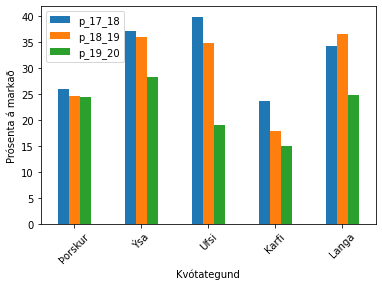

In [2]:
path ='C:\\Users\\Lenovo\ownCloud\\Radgjof\\Ráðgjöf\\Brim\\'

xl = pd.ExcelFile(path+"\\Yfirlit_uthlutun_1920.xlsx")
df_uthlutun = xl.parse('Úthlutun snyrt') 
df_uthlutun


df_uthlutun['p_17_18']=df_uthlutun['m_17_18']/df_uthlutun['Óslægt_17_18']/10
df_uthlutun['p_18_19']=df_uthlutun['m_18_19']/df_uthlutun['Óslægt_18_19']/10
df_uthlutun['p_19_20']=df_uthlutun['m_19_20']/df_uthlutun['Óslægt_19-20']/10


df_uthlutun.head(5).plot(x="Kvótategund",y=['p_17_18','p_18_19','p_19_20'], kind='bar')

plt.xticks(rotation=45) 
plt.ylabel('Prósenta á markað')



Nokkuð stór hluti aflamarks er færður á milli skipa ár hvert og eru ekki merkjanlegar breytingar á þessu magni á milli ára.  Myndin sýnir til dæmis að um 25% aflamarks í þorski er færðt á milli aðila. Meirihlutinn aflamarksins er oftast færður á milli ótengdra aðila eins og eftirfarandi mynd sýnir. 

Text(0, 0.5, 'Prósenta á milli óskyldra aðila')

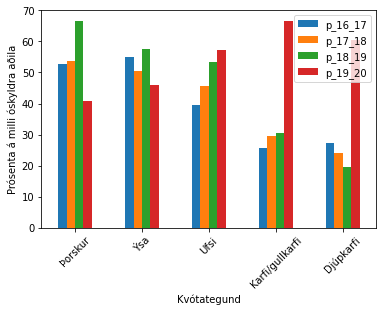

In [27]:
xl = pd.ExcelFile(path+"\\toflur_og_talnagogn_2018_2019.xlsx")
df_flutningur = xl.parse('Flutningur_aflamarks_1819') 

df_flutningur['p_19_20']=df_flutningur['m_19_20']/df_flutningur['f_s_19_20']*100
df_flutningur['p_18_19']=df_flutningur['m_18_19']/df_flutningur['f_s_18_19']*100
df_flutningur['p_17_18']=df_flutningur['m_17_18']/df_flutningur['f_s_17_18']*100
df_flutningur['p_16_17']=df_flutningur['m_16_17']/df_flutningur['f_s_16_17']*100


df_flutningur.head(5).plot(x="Kvótategund",y=['p_16_17','p_17_18','p_18_19','p_19_20'], kind='bar')


plt.xticks(rotation=45) 
plt.ylabel('Prósenta á milli óskyldra aðila')

# HHI útreikningar fyrir mikilvæga markaði

<span style="font-size:1.2em">Samþjöppun matvörumarkaðar</span>

In [29]:
pd.options.display.float_format = '{:,.0f}'.format
xl = pd.ExcelFile(path+"Samthjoppun_1920.xlsx")
df_matvara = xl.parse('matvara') 
df_matvara.iloc[:,4:8]

df_matvara.iloc[:,4:10].head(7)



,Eigandi eftir samruna,Velta 2019,Hlutdeild,HHI
0,Hagar,"80,483",47,"2,225"
1,Festi,"42,263",25,614
2,Samkaup,"34,000",20,397
3,Skeljungur,"3,865",2,5
4,Costco,"7,000",4,17
5,Aðrir,"3,000",2,3
6,Samtals,"170,611",100,"3,261"


<span style="font-size:1.2em">Samþjöppun bankamarkaðar</span>

In [30]:
pd.options.display.float_format = '{:,.0f}'.format
xl = pd.ExcelFile(path+"Samthjoppun_1920.xlsx")
df_bankar = xl.parse('bankar') 
df_bankar.iloc[:,0:1]

df_bankar.iloc[:,0:4]



,Banki,Heild %,Innlán %,HHI heild
0,Landsbanki,34,35,1156
1,Íslandsbanki,32,34,1024
2,Arionbanki,28,27,784
3,Kvika,3,4,9
4,Aðrir,3,0,9
5,Samtals,100,100,2982


In [39]:
pd.options.display.float_format = '{:,.0f}'.format

xl = pd.ExcelFile(
    "C:\\Users\\Lenovo\ownCloud\\Radgjof\\Ráðgjöf\\Brim\\Samthjoppun_1920_Huginn.xlsx"
)
df_fyrir = xl.parse('SÞ_fyrir')
df_eftir = xl.parse('SÞ_eftir')
df_eftir_kmb_grb = xl.parse('SÞ__eftir_kmb_grb')
df_eftir_Hugin = xl.parse('SÞ__eftir_Hugin')
df_hámörk = xl.parse('Hámörk')

In [40]:
df_fyrir = df_fyrir.drop(["Röð"],axis=1)
df_fyrir = df_fyrir.drop("Samtals 434317446",axis=1)

df_eftir = df_eftir.drop(["Röð"],axis=1)
df_eftir = df_eftir.drop("Samtals 434317446",axis=1)

df_eftir_kmb_grb = df_eftir_kmb_grb.drop(["Röð"],axis=1)
df_eftir_kmb_grb = df_eftir_kmb_grb.drop("Samtals 434317446",axis=1)

df_eftir_Hugin = df_eftir_Hugin.drop(["Röð"],axis=1)
df_eftir_Hugin = df_eftir_Hugin.drop("Samtals 434317446",axis=1)


df_fyrir.rename(columns = {'Hlutfall  %':'ÞÍG'}, inplace = True)
df_eftir.rename(columns = {'Hlutfall  %':'ÞÍG'}, inplace = True)
df_eftir_kmb_grb.rename(columns = {'Hlutfall  %':'ÞÍG'}, inplace = True)
df_eftir_Hugin.rename(columns = {'Hlutfall  %':'ÞÍG'}, inplace = True)

In [41]:
fiskar=list(df_fyrir.columns)

fiskar.remove('Eigandi')
fiskar.remove('ÞÍG')

<span style="font-size:1.2em">Samþjöppun fyrir og eftir 8. september ef breytingar á yfirráðum í Brimi hefðu átt sér stað:</span>

In [38]:
HHI_fyrir=df_fyrir.ÞÍG.multiply(100).pow(2).sum()
HHI_eftir=df_eftir.ÞÍG.multiply(100).pow(2).sum()
HHI_eftir_kmb_grb=df_eftir_kmb_grb.ÞÍG.multiply(100).pow(2).sum()
HHI_eftir_Hugin=df_eftir_Hugin.ÞÍG.multiply(100).pow(2).sum()


HHI_mismunur=HHI_eftir - HHI_fyrir
HHI_mismunur_kmb_grb =HHI_eftir_kmb_grb-HHI_eftir
HHI_mismunur_Hugin =HHI_eftir_Hugin-HHI_eftir_kmb_grb

CR4_fyrir = df_fyrir.ÞÍG.multiply(100).head(3).sum()
CR4_eftir = df_eftir.ÞÍG.multiply(100).head(3).sum()

print("HHI fyrir þorskígildistonn fyrir 8.september 2019:","%.1f" % HHI_fyrir)
print("HHI fyrir þorskígildistonn eftir 8.september 2019:","%.1f" % HHI_eftir)
print("Hækkun á HHI fyrir þorskígildistonn fyrir og eftir 8.september 2019:","%.1f" % HHI_mismunur)

print("HHI fyrir þorskígildistonn fyrir kaup á Kambi og Grábrók:","%.1f" % HHI_eftir)
print("HHI fyrir þorskígildistonn eftir 8.september 2019:","%.1f" % HHI_eftir_kmb_grb)
print("Hækkun á HHI fyrir þorskígildistonn fyrir og eftir 8.september 2019:","%.1f" % HHI_mismunur_kmb_grb)

#Töflur búnar til fyrir skýrslu:
t_fyrir=df_fyrir
t_fyrir['ÞÍG']=df_fyrir.ÞÍG.multiply(100)
t_fyrir['HHI']=df_fyrir.ÞÍG.pow(2)
t_fyrir = t_fyrir.drop(t_fyrir.iloc[:,2:32], axis=1)
t_fyrir.head(4)

t_eftir=df_eftir
t_eftir['ÞÍG']=df_eftir.ÞÍG.multiply(100)
t_eftir['HHI']=df_eftir.ÞÍG.pow(2)
t_eftir = t_eftir.drop(t_eftir.iloc[:,2:32], axis=1)
t_eftir.head(8)

t_eftir_kmb_grb=df_eftir_kmb_grb
t_eftir_kmb_grb['ÞÍG']=df_eftir_kmb_grb.ÞÍG.multiply(100)
t_eftir_kmb_grb['HHI']=df_eftir_kmb_grb.ÞÍG.pow(2)
t_eftir_kmb_grb = t_eftir_kmb_grb.drop(t_eftir_kmb_grb.iloc[:,2:32], axis=1)
t_eftir_kmb_grb.head(8)


t_saman = pd.concat([t_fyrir, t_eftir,t_eftir_kmb_grb], axis=1)

t_saman.columns=['Eigandi fyrir','ÞÍG (%)','Framlag til HHI','Eigandi eftir', 'ÞÍG (%)','Framlag til HHI','Eigandi','ÞÍG eftir_kmb_grb','HHI eftir_kmb_grb']

t_saman.head(8)


HHI fyrir þorskígildistonn fyrir 8.september 2019: 47860768891.9
HHI fyrir þorskígildistonn eftir 8.september 2019: 60449069108.2
Hækkun á HHI fyrir þorskígildistonn fyrir og eftir 8.september 2019: 12588300216.3
HHI fyrir þorskígildistonn fyrir kaup á Kambi og Grábrók: 60449069108.2
HHI fyrir þorskígildistonn eftir 8.september 2019: 62744961190.6
Hækkun á HHI fyrir þorskígildistonn fyrir og eftir 8.september 2019: 2295892082.4


,Eigandi fyrir,ÞÍG (%),Framlag til HHI,Eigandi eftir,ÞÍG (%),Framlag til HHI,Eigandi,ÞÍG eftir_kmb_grb,HHI eftir_kmb_grb
0,Brim + ÖV,"117,555","13,819,271,478",Brim + ÖV+ÚR+KG,"167,600","28,089,821,782",Brim + ÖV+ÚR+KG+KB+GB,"174,386","30,410,621,431"
1,Samherji+ Sæból+ÚA,"90,719","8,229,947,662",Samherji+ Sæból+ÚA,"90,719","8,229,947,662",Samherji+ Sæból+ÚA,"90,719","8,229,947,662"
2,FISK + SC,"55,590","3,090,301,391",FISK + SC,"55,590","3,090,301,391",FISK + SC,"55,590","3,090,301,391"
3,Síldarvinnslan + BH +RH,"81,194","6,592,447,050",Síldarvinnslan + BH +RH,"81,194","6,592,447,050",Síldarvinnslan + BH +RH,"81,194","6,592,447,050"
4,Vinnslustöðin hf.,"50,321","2,532,236,595",Vinnslustöðin hf.,"50,321","2,532,236,595",Vinnslustöðin hf.,"50,321","2,532,236,595"
5,Þorbjörn hf.,"48,085","2,312,195,038",Þorbjörn hf.,"48,085","2,312,195,038",Þorbjörn hf.,"48,085","2,312,195,038"
6,Skinney-Þinganes hf.,"42,132","1,775,123,150",Skinney-Þinganes hf.,"42,132","1,775,123,150",Skinney-Þinganes hf.,"42,132","1,775,123,150"
7,Útgerðarfélag Reykjavíkur hf.,"39,685","1,574,933,975",Ísfélag Vestmannaeyja hf.,"37,984","1,442,790,576",Ísfélag Vestmannaeyja hf.,"37,984","1,442,790,576"


<span style="font-size:1.2em">Samþjöppun í karfa fyrir og eftir 8. september ef breytingar á yfirráðum í Brimi hefðu átt sér stað:</span>

In [36]:
HHI_listi = []

for fiskur in fiskar:

    df_fyrir = df_fyrir.sort_values(by=[fiskur], ascending=False)
    df_eftir = df_eftir.sort_values(by=[fiskur], ascending=False)

    cr4_fyrir = df_fyrir[fiskur].head(3).sum()
    cr4_eftir = df_eftir[fiskur].head(3).sum()
    cr4_mismunur = cr4_eftir - cr4_fyrir

    cr8_fyrir = df_fyrir[fiskur].head(7).sum()
    cr8_eftir = df_eftir[fiskur].head(7).sum()
    cr8_mismunur = cr8_eftir - cr8_fyrir

    HHI_fyrir = df_fyrir[fiskur].pow(2).sum()
    HHI_eftir = df_eftir[fiskur].pow(2).sum()

    HHI_mismunur = HHI_eftir - HHI_fyrir
    HHI_mismunur
    HHI_listi.append([
        HHI_fyrir, HHI_eftir, HHI_mismunur, cr8_fyrir, cr8_eftir, cr8_mismunur
    ])

df4 = pd.DataFrame(HHI_listi,
                   columns=[
                       'HHI_fyrir', 'HHI_eftir', 'HHI breyting', 'cr8_fyrir',
                       'cr8_eftir', 'cr8 breyting'
                   ],
                   index=fiskar)



df4.drop(["Þorskur","Ýsa","Ufsi","Grálúða","Skrápflúra","Hlýri", "Sandkoli", "Skötuselur", "Blálanga",\
          "Langlúra","Þykkvalúra", "Keila", "Langa","Skarkoli","Steinbítur","Úthafsrækja", "Rækja við Snæf.nes",\
         "Arnarfj.rækja","Rækja í Djúpi", "Humar","Gulllax","Djúpkarfi", "Síld", "Loðna","Kolmunni","Makríll", "NÍ-síld"],axis=0, inplace=True)

pd.options.display.float_format = '{:,.0f}'.format

df4.head(7)


,HHI_fyrir,HHI_eftir,HHI breyting,cr8_fyrir,cr8_eftir,cr8 breyting
Gullkarfi,"1,268","1,961",693,77,80,3
Úthafskarfi,"2,004","2,281",277,92,94,3
Litli karfi,"2,139","3,646","1,508",98,99,1


<span style="font-size:1.2em">Samþjöppun í uppsjávartegundum:</span>

In [42]:
HHI_listi=[]

for fiskur in fiskar:

    df_eftir_kmb_grb=df_eftir_kmb_grb.sort_values(by=[fiskur],ascending=False)
    df_eftir_Hugin=df_eftir_Hugin.sort_values(by=[fiskur],ascending=False)
    
    cr4_eftir_kmb_grb=df_eftir_kmb_grb[fiskur].head(3).sum()
    cr4_eftir_Hugin=df_eftir_Hugin[fiskur].head(3).sum()
    cr4_mismunur=cr4_eftir_Hugin-cr4_eftir_kmb_grb
    
    cr8_eftir_kmb_grb=df_eftir_kmb_grb[fiskur].head(7).sum()
    cr8_eftir_Hugin=df_eftir_Hugin[fiskur].head(7).sum()
    cr8_mismunur=cr8_eftir_Hugin-cr8_eftir_kmb_grb
    
    
    HHI_eftir_kmb_grb=df_eftir_kmb_grb[fiskur].pow(2).sum()
    HHI_eftir_Hugin=df_eftir_Hugin[fiskur].pow(2).sum()
    
    

    HHI_mismunur=HHI_eftir_Hugin - HHI_eftir_kmb_grb
    HHI_mismunur
    HHI_listi.append( [HHI_eftir_kmb_grb, HHI_eftir_Hugin, HHI_mismunur,
                      cr8_eftir_kmb_grb,cr8_eftir_Hugin,cr8_mismunur]) 
    
df4 = pd.DataFrame(HHI_listi, columns = ['HHI fyrir Hugin', 'HHI eftir Hugin', 'HHI breyting',
                                         'cr8 fyrir Hugin','cr8 eftir Hugin', 'cr8 breyting'],index=fiskar)

df4.drop(["Þorskur","Ýsa","Ufsi","Gullkarfi","Grálúða","Skrápflúra","Hlýri", "Sandkoli", "Skötuselur", "Blálanga","Litli karfi","Úthafskarfi",\
          "Langlúra","Þykkvalúra", "Keila", "Langa","Skarkoli","Steinbítur","Úthafsrækja", "Rækja við Snæf.nes",\
         "Arnarfj.rækja","Rækja í Djúpi", "Humar","Gulllax","Djúpkarfi"],axis=0, inplace=True)


pd.options.display.float_format = '{:,.0f}'.format
df4.head(7)


,HHI fyrir Hugin,HHI eftir Hugin,HHI breyting,cr8 fyrir Hugin,cr8 eftir Hugin,cr8 breyting
Síld,"1,375","1,433",59,96,98,2
Loðna,"1,424","1,456",33,94,95,1
Kolmunni,"2,018","2,067",49,96,99,3
Makríll,"1,155","1,404",249,84,91,7
NÍ-síld,"1,472","1,591",119,95,100,5



# Verð, dreifing þess og áhrifavaldar

In [12]:
xl = pd.ExcelFile(path+"\\fish_prices.xlsx")
df_fish_prices = xl.parse('Karfi') 

#df_fish_prices.sort_values('viðskiptaverð_isk',inplace=True)

df_fish_prices.reset_index(inplace=True, drop=True)

X=df_fish_prices.loc[:,'erlent_verð_isk':'olíuverð_isk']
Y=df_fish_prices['viðskiptaverð_isk']




## Verðdreifni

In [13]:
print(Y[0:11].mad() / Y[0:11].mean())
print(Y[12:23].mad() / Y[12:23].mean())
print(Y[24:35].mad() / Y[24:35].mean())
print(Y[36:43].mad() / Y[36:43].mean())

0.1788098147974053
0.1890835538681263
0.11902670320223513
0.12297442899089518


## Newton aðfallsgreining

In [14]:
#reiknað með regressor
seed = 2
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=test_size,
                                                    random_state=seed,
                                                    shuffle=True)

# DMatrices

dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Building a baseline model
# "Learn" the mean from the training data
mean_train = np.mean(y_train)
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

params = {
    # Parameters that we are going to tune.
    'max_depth': 8,
    'min_child_weight': 3,
    'eta': 0.05,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    # Other parameters
    'objective': 'reg:squarederror',
    'eval_metric': "mae"
}

xgb_regressor = xgb.train(params,
                          dtrain,
                          num_boost_round=200,
                          evals=[(dtest, "Test")],
                          verbose_eval=20)

y_pred = xgb_regressor.predict(dtest)

Baseline MAE is 33.94
[0]	Test-mae:74.95503
[20]	Test-mae:27.67914
[40]	Test-mae:21.07279
[60]	Test-mae:20.67182
[80]	Test-mae:20.84930
[100]	Test-mae:20.79085
[120]	Test-mae:22.10479
[140]	Test-mae:22.96112
[160]	Test-mae:23.55153
[180]	Test-mae:23.89773
[199]	Test-mae:24.25798


mae  : 24.26
r2   : 0.24
evs  : 0.25


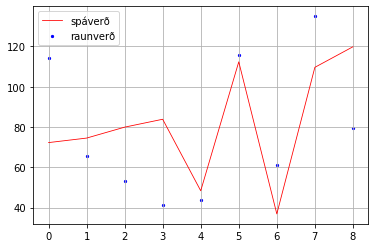

range(0, 9)

In [15]:
print("mae  : %.2f" % mean_absolute_error(y_test, y_pred))
print("r2   : %.2f" % r2_score(y_test, y_pred))
print("evs  : %.2f" % explained_variance_score(y_test, y_pred))

x_ax = range(len(y_test))
plt.scatter(x_ax, y_test, s=5, color="blue", label="raunverð")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="spáverð")
plt.grid(True)
plt.legend()
plt.show()

x_ax

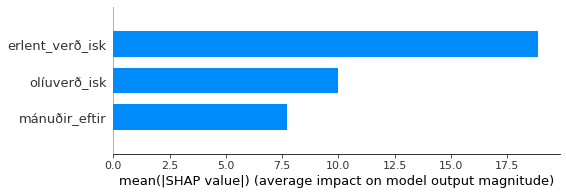

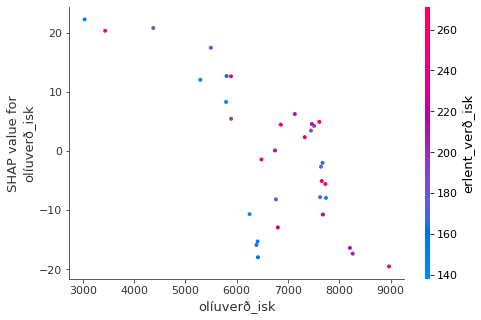

In [16]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(xgb_regressor)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train, plot_type='bar')

shap.dependence_plot('olíuverð_isk', shap_values, X_train)

shap.force_plot(explainer.expected_value, shap_values, X_train)

In [17]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(n_estimators=10,
                               criterion='mse',
                               random_state=1,
                               n_jobs=-1)
forest.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [18]:
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (mean_squared_error(
    y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' %
      (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

MSE train: 166.940, test: 375.782
R^2 train: 0.845, test: 0.647


# Aðfallsgreining, nokkrar aðferðir

In [19]:
reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(X, Y)
reg2.fit(X, Y)
reg3.fit(X, Y)

ereg = VotingRegressor([('gb', reg1), ('rf', reg2), ('lr', reg3)])
ereg.fit(X, Y)

VotingRegressor(estimators=[('gb', GradientBoostingRegressor(random_state=1)),
                            ('rf', RandomForestRegressor(random_state=1)),
                            ('lr', LinearRegression())])

In [20]:
xt = X[:42]
yt = Y[:42]

pred1 = reg1.predict(xt)
pred2 = reg2.predict(xt)
pred3 = reg3.predict(xt)
pred4 = ereg.predict(xt)


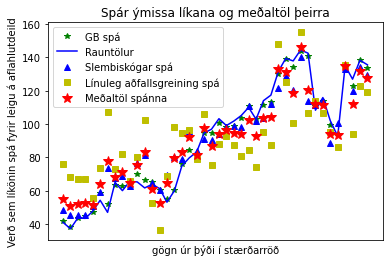

In [21]:
plt.figure()

plt.plot(pred1, 'g*', label='GB spá')
plt.plot(yt, 'b', label='Rauntölur')
plt.plot(pred2, 'b^', label='Slembiskógar spá')
plt.plot(pred3, 'ys', label='Línuleg aðfallsgreining spá')
plt.plot(pred4, 'r*', ms=10, label='Meðaltöl spánna')

plt.tick_params(axis='x',
                which='both',
                bottom=False,
                top=False,
                labelbottom=False)
plt.ylabel('Verð sem líkönin spá fyrir leigu á aflahlutdeild')
plt.xlabel('gögn úr þýði í stærðarröð')
plt.legend(loc="best")
plt.title('Spár ýmissa líkana og meðaltöl þeirra')

plt.show()

In [22]:
X=pd.concat([np.log(X.erlent_verð_isk),X.mánuðir_eftir, np.log(X.olíuverð_isk) ], axis=1)
Y=np.log(Y)


In [23]:
pd.options.display.float_format = '{:,.3f}'.format



In [24]:
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    Y,
                                                    test_size=.2,
                                                    random_state=2)

from sklearn import datasets, linear_model
from sklearn.linear_model import RANSACRegressor

# Create linear regression object
regr = linear_model.LinearRegression()
regr = RANSACRegressor(random_state=0).fit(X, Y)

# Train the model using the training sets
regr.fit(x_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(x_test)

# The coefficients

regr.score(X, Y)

# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))

Mean squared error: 0.16
Coefficient of determination: 0.08


In [25]:
import statsmodels.api as sm

# Fit regression model
results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      viðskiptaverð_isk   R-squared (uncentered):                   0.996
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              3144.
Date:                Sun, 07 Mar 2021   Prob (F-statistic):                    1.67e-47
Time:                        13:49:08   Log-Likelihood:                         -7.7752
No. Observations:                  43   AIC:                                      21.55
Df Residuals:                      40   BIC:                                      26.83
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
erlent_verð_isk     1.2409      0.181      6.856      0.000       0.875       1.607
mánuðir_eftir      -0.0311      0.013     -2.320      0.026      -0.058      -0.004
olíuverð_isk       -0.2114      0.107     -1.983      0.054      -0.427       0.004
==============================================================================
Omnibus:                        3.912   Durbin-Watson:                   1.268
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                2.983
Skew:                          -0.634   Prob(JB):                        0.225
Kurtosis:                       3.242   Cond. No.                         57.0
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Markaðshlutdeild á erlendum mörkuðum

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.,
        700000., 800000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

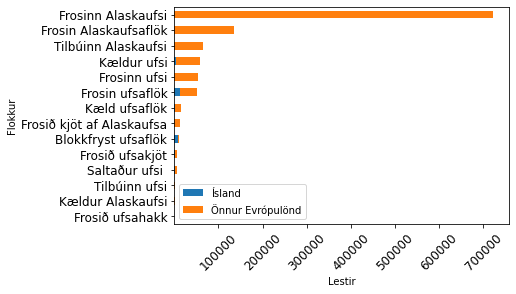

In [26]:
from matplotlib.ticker import FormatStrFormatter
xl = pd.ExcelFile(path+"global_market_share.xlsx")
df_market_share = xl.parse('Ufsi')


ax=df_market_share.sort_values('Europe').plot(kind='barh',
                                              x='Flokkur',
                                              y=['Ísland','Önnur Evrópulönd'],
                                              fontsize=12,
                                              stacked=True)
ax.set_xlabel("Lestir")
plt.xticks(rotation=45) 

